In [ ]:
# talvez seja necessário instalar algumas bibliotecas
!pip install rdkit
!pip install pubchempy
!pip install pybel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.0 MB/s eta 0:00:00


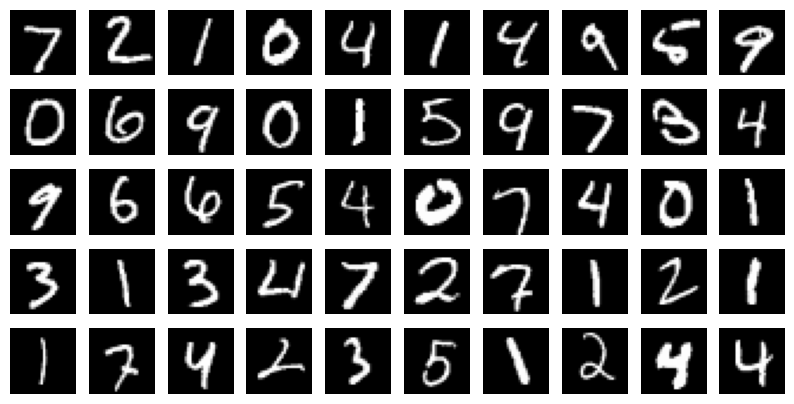

In [ ]:
# Esse código utiliza uma base de dados já existente com imagens para o treinamento do modelo
# Nesse bloco será mostrado as primeiras 50 imagens apenas para exemplificar o estilo dos dígitos

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Carregar os dados MNIST de treinamentoe  teste
(train_images, train_labels), (test_images, teste_labels) = mnist.load_data()

# Exibir as primeiras 50 imagens do conjunto de treinamento
plt.figure(figsize=(10, 5))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregar dados MNIST de treinamentop
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pré-processamento dos dados
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construir o modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # imagens com 28x28 pixels
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Acurácia do modelo: {test_acc}')

model.save('modelo_digitos.keras') # salvar o modelo para usar posteriormente

KeyboardInterrupt: ignored

1/1 [==============================] - 0s 104ms/step
A imagem contém o dígito: 7


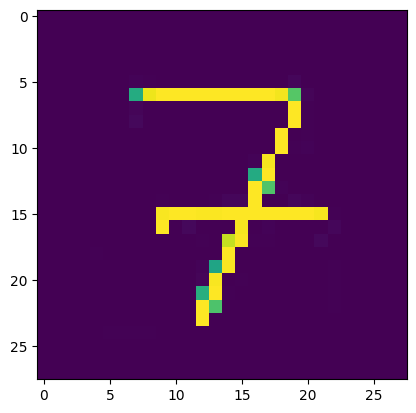

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.models import load_model

model = load_model('modelo_digitos.keras') # carregar o modelo caso já o tenha treinado
img_path = '/content/num7.jpg' # diretório da imagem que deseja classificar
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale') # converter a imagem para 28x28 e escala de cinza


img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

predictions = model.predict(img_array) # modelo classifica a imagem

predicted_class = np.argmax(predictions[0])

plt.imshow(img)
print(f'A imagem contém o dígito: {predicted_class}')